In [1]:
import cv2
import numpy as np
import contextlib  # Add this import statement
import os
import matplotlib.pyplot as plt
from contextlib import contextmanager
from tensorflow.keras.models import load_model

In [2]:
model = load_model('CNNwithoutbalancing.keras')  

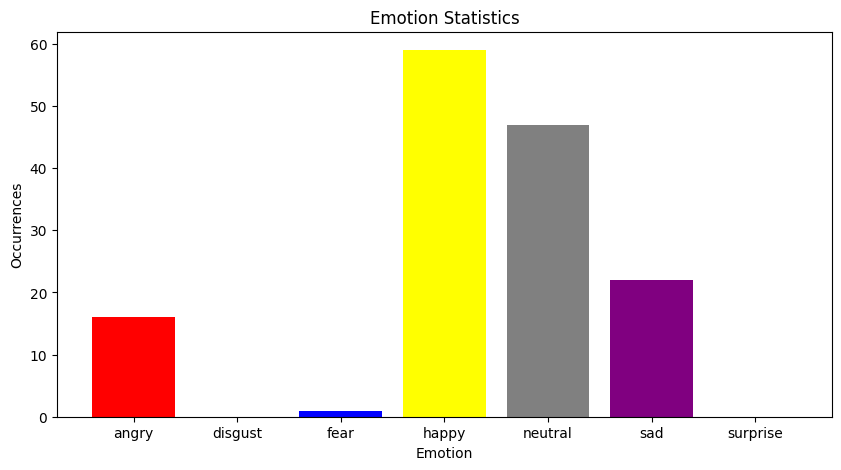

In [8]:


# Define emotion labels
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Load face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start video capture from the webcam
cap = cv2.VideoCapture(0)  # Use 0 for the default camera

# Create a window for display
cv2.namedWindow('Real-time Emotion Detection', cv2.WINDOW_NORMAL)  # Optional for better control

# Lists to store emotion data
emotion_data = {label: 0 for label in emotion_labels}

# Define the suppress_stdout context manager
@contextmanager
def suppress_stdout():
    with open(os.devnull, 'w') as fnull:
        with contextlib.redirect_stdout(fnull):
            yield

while cv2.getWindowProperty('Real-time Emotion Detection', cv2.WND_PROP_VISIBLE) >= 0:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret:  # Check if frame was read successfully
        # Convert frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            # Extract the face ROI
            face_roi = gray_frame[y:y + h, x:x + w]

            # Resize, normalize, and reshape the face ROI
            resized_face = cv2.resize(face_roi, (48, 48), interpolation=cv2.INTER_AREA)
            normalized_face = resized_face / 255.0
            reshaped_face = normalized_face.reshape(1, 48, 48, 1)

            # Predict emotions using the model (with suppressed output)
            with suppress_stdout():
                preds = model.predict(reshaped_face)[0]

            # Get the predicted emotion label
            emotion_idx = preds.argmax()
            detected_emotion = emotion_labels[emotion_idx]

            # Draw rectangle around face and label with predicted emotion
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 0), 2)
            cv2.putText(frame, detected_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2, cv2.LINE_AA)

            # Update emotion data
            emotion_data[detected_emotion] += 1

        # Display the resulting frame
        cv2.imshow('Real-time Emotion Detection', frame)

        # Exit if 'q' is pressed 
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break  # Window is closed, exit the loop

# Release resources
cap.release()
cv2.destroyAllWindows()

# Plotting diagrams and statistics without emojis
labels, values = zip(*emotion_data.items())
colors = ['red', 'green', 'blue', 'yellow', 'gray', 'purple', 'orange']

# Plot bar chart without emojis
plt.figure(figsize=(10, 5))
plt.bar(labels, values, color=colors)
plt.title('Emotion Statistics')
plt.xlabel('Emotion')
plt.ylabel('Occurrences')
plt.show()


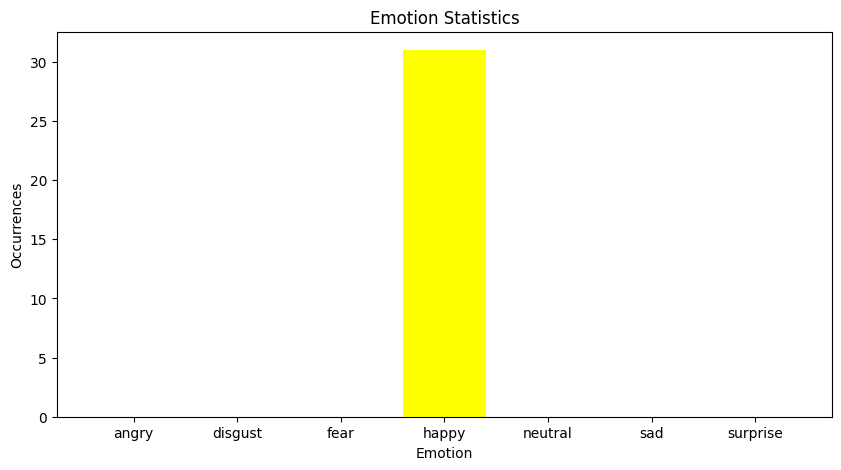

In [6]:


# Define emotion labels
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Load face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start video capture from the webcam
cap = cv2.VideoCapture('test.mp4')  # Use 0 for the default camera

# Create a window for display
cv2.namedWindow('Real-time Emotion Detection', cv2.WINDOW_NORMAL)  # Optional for better control

# Lists to store emotion data
emotion_data = {label: 0 for label in emotion_labels}

# Define the suppress_stdout context manager
@contextmanager
def suppress_stdout():
    with open(os.devnull, 'w') as fnull:
        with contextlib.redirect_stdout(fnull):
            yield

while cv2.getWindowProperty('Real-time Emotion Detection', cv2.WND_PROP_VISIBLE) >= 0:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret:  # Check if frame was read successfully
        # Convert frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            # Extract the face ROI
            face_roi = gray_frame[y:y + h, x:x + w]

            # Resize, normalize, and reshape the face ROI
            resized_face = cv2.resize(face_roi, (48, 48), interpolation=cv2.INTER_AREA)
            normalized_face = resized_face / 255.0
            reshaped_face = normalized_face.reshape(1, 48, 48, 1)

            # Predict emotions using the model (with suppressed output)
            with suppress_stdout():
                preds = model.predict(reshaped_face)[0]

            # Get the predicted emotion label
            emotion_idx = preds.argmax()
            detected_emotion = emotion_labels[emotion_idx]

            # Draw rectangle around face and label with predicted emotion
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 0), 2)
            cv2.putText(frame, detected_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2, cv2.LINE_AA)

            # Update emotion data
            emotion_data[detected_emotion] += 1

        # Display the resulting frame
        cv2.imshow('Real-time Emotion Detection', frame)

        # Exit if 'q' is pressed 
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break  # Window is closed, exit the loop

# Release resources
cap.release()
cv2.destroyAllWindows()

# Plotting diagrams and statistics without emojis
labels, values = zip(*emotion_data.items())
colors = ['red', 'green', 'blue', 'yellow', 'gray', 'purple', 'orange']

# Plot bar chart without emojis
plt.figure(figsize=(10, 5))
plt.bar(labels, values, color=colors)
plt.title('Emotion Statistics')
plt.xlabel('Emotion')
plt.ylabel('Occurrences')
plt.show()
